In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
#Create a list of all files in current directory
all_files = os.listdir('C:/Users/Dell/Desktop/Neuron labs/datasets')
# Create an empty list to assign csv files
csv_files = []

# Create a lis of only the csv files in current directory
for file in all_files:
    if file[-3:] == 'csv':
        csv_files.append(file)
    else: 
        pass

csv_files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
all_data = pd.concat((pd.read_csv("C:/Users/Dell/Desktop/Neuron labs/datasets/"+f) for f in csv_files))

# Data Cleaning

In [5]:
all_data =all_data.dropna(how="all")
all_data = all_data[all_data['Order Date'].str[0:2]!="Or"]

all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [9]:
all_data['Months'] = all_data['Order Date'].str[0:2]
all_data['Months']  = all_data['Months'].astype(int)

In [10]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [13]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Analyzing through ploting graphs & charts

#  Bar Plot

C:\Users\Dell\AppData\Local\Temp\ipykernel_6428\4105207305.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  q1=all_data.groupby('Months').sum()


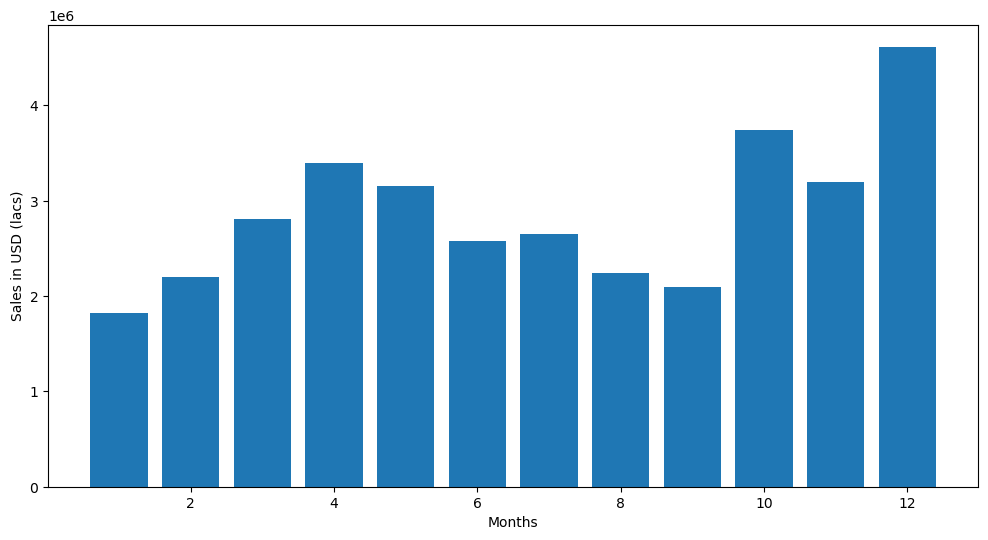

In [47]:
q1=all_data.groupby('Months').sum()
plt.figure(figsize=(12,6))
months= range(1,13)
plt.bar(months,q1['Sales'])
plt.ylabel('Sales in USD (lacs)')
plt.xlabel('Months')
plt.show()

# Scatter Plot

In [15]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


C:\Users\Dell\AppData\Local\Temp\ipykernel_6428\208150201.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  q2=all_data.groupby('City').sum()


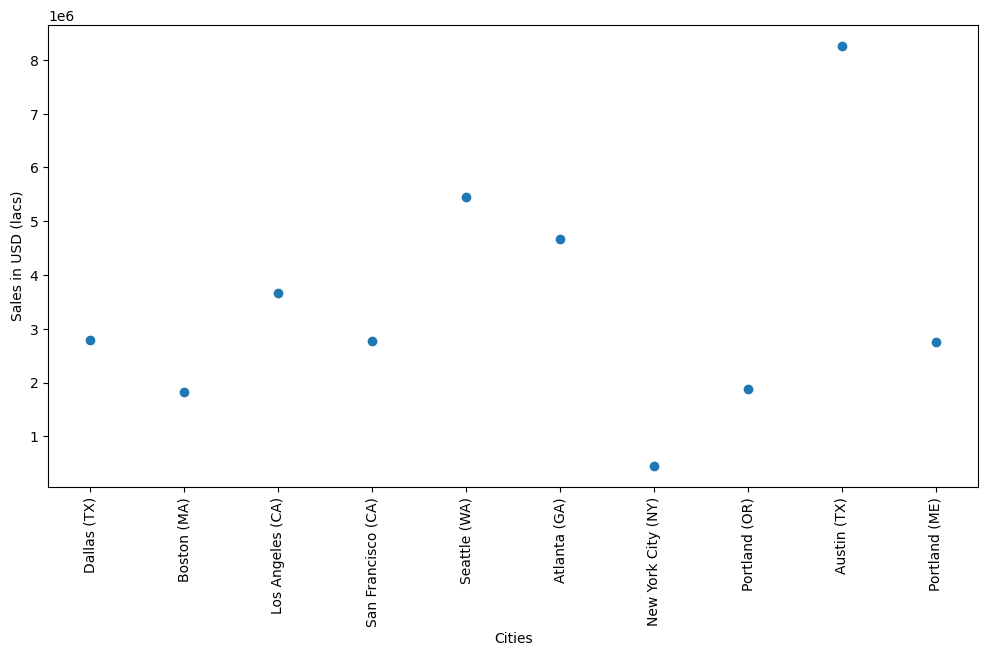

In [48]:
q2=all_data.groupby('City').sum()
plt.figure(figsize=(12,6))
cities = all_data['City'].unique()
plt.scatter(cities,q2['Sales'])
plt.xticks(rotation= 90)
plt.ylabel('Sales in USD (lacs)')
plt.xlabel('Cities')
plt.show()

# Plot with Grid lines

In [17]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


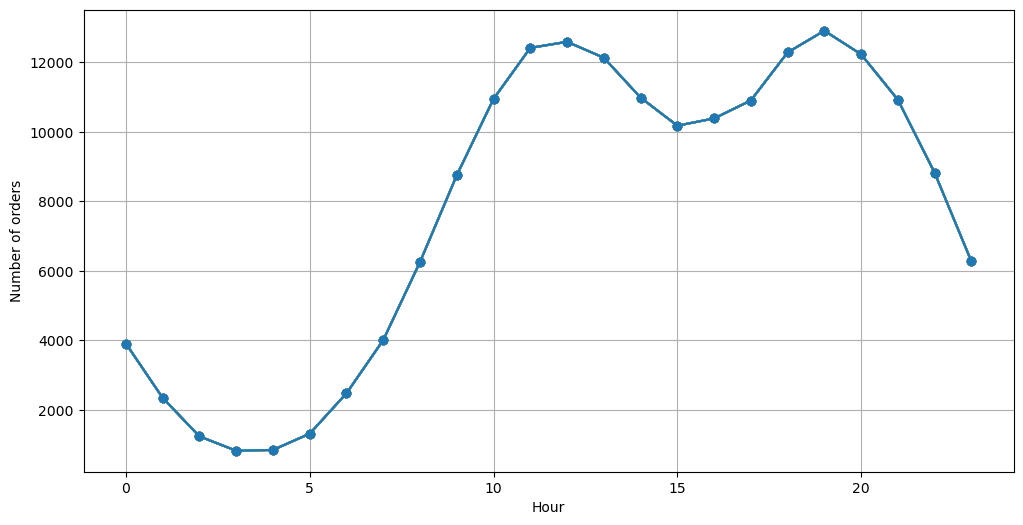

In [45]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.figure(figsize=(12,6))
plt.plot(hours,all_data.groupby('Hour').count(),marker='o')
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

# Step Plot 

C:\Users\Dell\AppData\Local\Temp\ipykernel_6428\3408788482.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']
C:\Users\Dell\AppData\Local\Temp\ipykernel_6428\3408788482.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_group.sum()


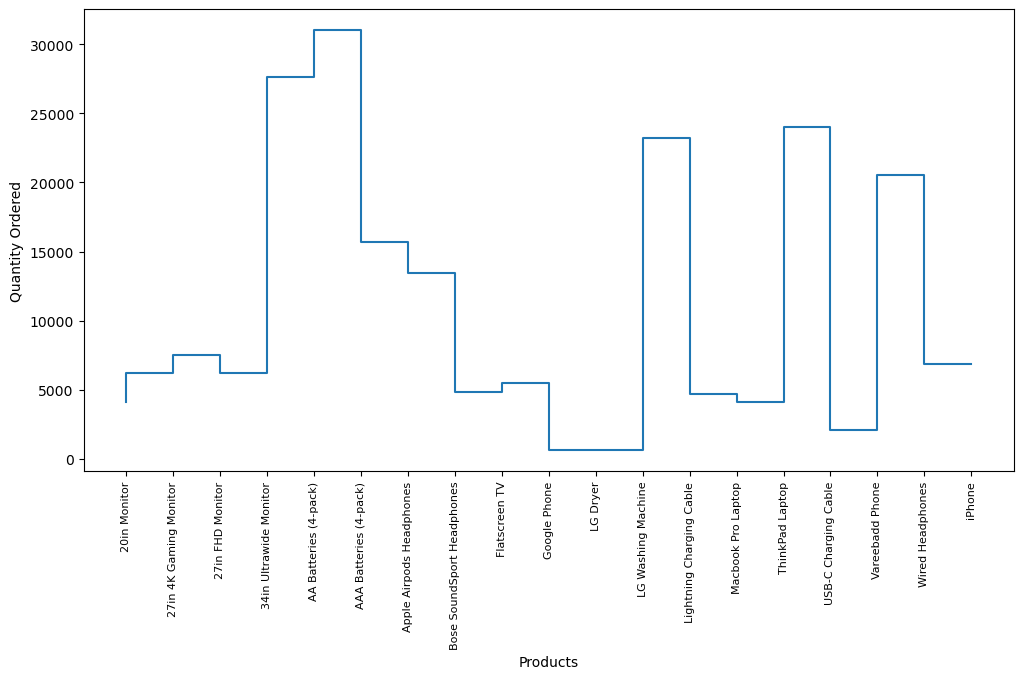

In [58]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
product_group.sum()
products = [product for product, df in product_group]
plt.figure(figsize=(12,6))
plt.step(products,quantity_ordered)
plt.xticks(products, rotation='vertical',size='8')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

# Bar Plot with Stackplot

C:\Users\Dell\AppData\Local\Temp\ipykernel_6428\485840888.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
C:\Users\Dell\AppData\Local\Temp\ipykernel_6428\485840888.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6428\485840888.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


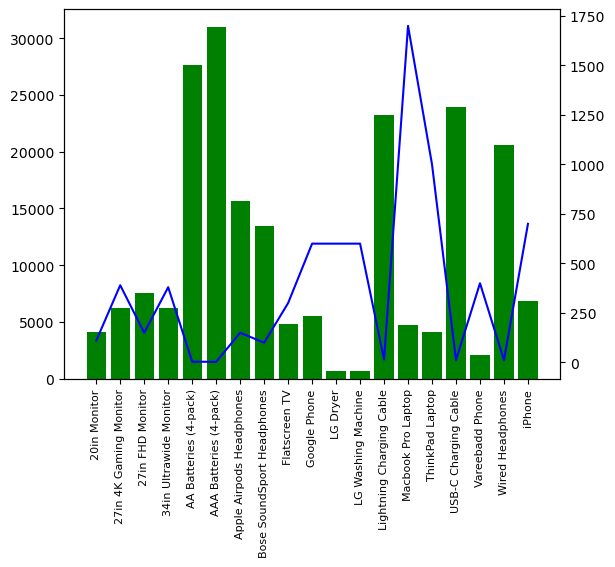

In [64]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
fig.show()